In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#outcome = 1 diabet
#outcome = 0 healthy

data = pd.read_csv(r"C:\Users\ktutk\Desktop\archive (2)\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


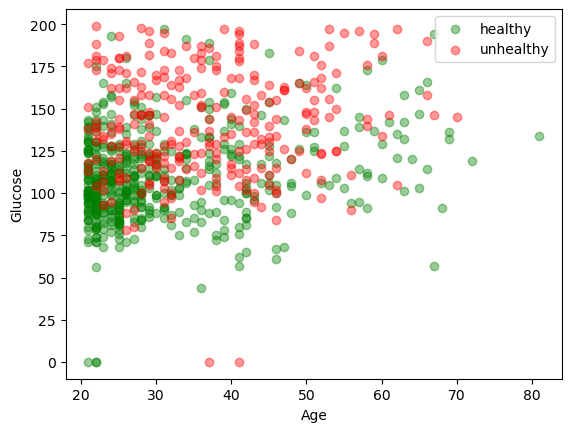

In [3]:
#people with diabets and healhty people's distribution

people_with_diabets = data[data.Outcome == 1]
healthy_people = data[data.Outcome == 0]

#a distribution sample that only includes gloucose

plt.scatter(healthy_people.Age, healthy_people.Glucose, color="green", label="healthy", alpha = 0.4)
plt.scatter(people_with_diabets.Age, people_with_diabets.Glucose, color="red", label="unhealthy", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

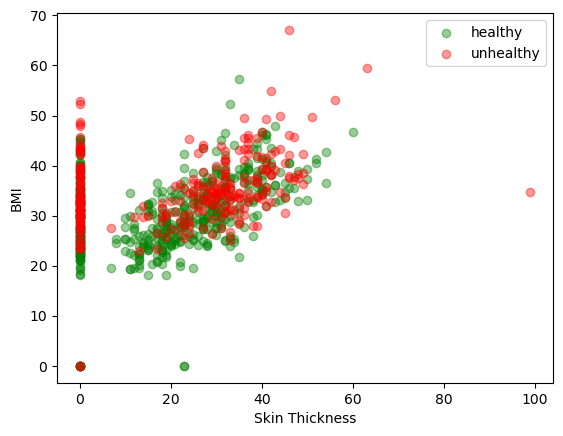

In [4]:
plt.scatter(healthy_people.SkinThickness, healthy_people.BMI, color="green", label="healthy", alpha = 0.4)
plt.scatter(people_with_diabets.SkinThickness, people_with_diabets.BMI, color="red", label="unhealthy", alpha=0.4)
plt.xlabel("Skin Thickness")
plt.ylabel("BMI")
plt.legend()
plt.show()

In [5]:
#determining x and y axes

y = data.Outcome.values 
x_raw_data = data.drop(["Outcome"], axis=1)

#normalization

x = (x_raw_data - np.min(x_raw_data)) / (np.max(x_raw_data) - np.min(x_raw_data))

#before
print("Raw Datas Before Normalization:\n")
print(x_raw_data.head())

#after
print("\n\n\nDatas for Training After Normalization")
print(x.head())

Raw Datas Before Normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Datas for Training After Normalization
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.

C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
#splitting train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

#KNN Model

knn = KNeighborsClassifier(n_neighbors = 7) # k = 3
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Test result for k=3 ", knn.score(x_test, y_test))


Test result for k=3  0.8116883116883117


In [20]:
#determining best k amount

count = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train,y_train)
    print(count, " ", "Accuracy Rate: %", knn_new.score(x_test, y_test)*100)
    count += 1
    

1   Accuracy Rate: % 69.48051948051948
2   Accuracy Rate: % 74.02597402597402
3   Accuracy Rate: % 78.57142857142857
4   Accuracy Rate: % 75.97402597402598
5   Accuracy Rate: % 79.87012987012987
6   Accuracy Rate: % 79.22077922077922
7   Accuracy Rate: % 81.16883116883116
8   Accuracy Rate: % 79.22077922077922
9   Accuracy Rate: % 78.57142857142857
10   Accuracy Rate: % 79.22077922077922


In [22]:
#for prediction of new unhealthy people

from sklearn.preprocessing import MinMaxScaler

#normalization

sc = MinMaxScaler()
sc.fit_transform(x_raw_data)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1